<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/exercise_2.17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: Exercise 2.17

Name: JM

Date:  December 2020

Consider a perfectly mixed stirred-tank heater, with a single liquid feed stream and a single liquid product stream, as shown below 

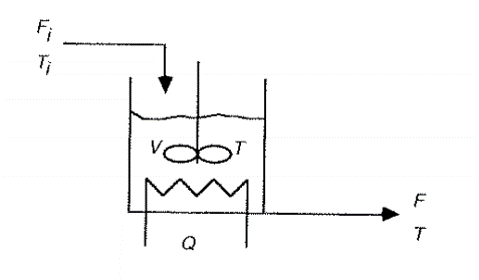

Develop the material and energy balance equations that describe this process. $F_i$ is the volumetric flowrate into the tank, $F$ is the volumetric flowrate out of the tank, $T_i$ is the temperature of the liquid entering the tank, $T$ is the temperature of the fluid in the tank, $h$ is the height of liquid in the tank, and $Q$ is the rate of energy added to the tank. State assumptions (such as constant density, etc.).

Assume that the volume can vary with time and that $F$ is proportional to $\sqrt h$. How many differential equationd does it take to model this system? What are the state variables? What are the parameters? What are the inputs? List the information neccesary to solve this problem.

1. Draw a schematic diagram

2. List all assumptions 

2.1. constant density 
2.2. constant pressure
2.3. isolated tank 
2.4. constant area

3. Determine spatial dependence 
there is no spatial depencence --> differential equations 


# Write dynamic balances (material, species, energy)

### Material balance 

$$\frac{d(V \rho)}{dt} = F_i \rho - F \rho$$

$$\frac{dV}{dt} = F_i  - F $$

$$\frac{d(A h)}{dt} = F_i  - F $$

$$\frac{dh}{dt} = \frac{F_i  - F}{A} $$

Considering $F = \sqrt h$

$$\frac{dh}{dt} = \frac{F_i  - \sqrt h}{A} $$


### Energy Balance

$$\frac{dU}{dt} = F_i \rho \bar{U}_i - F \rho \bar{U} + Q + W_T$$

$$\frac{d(H - PV)}{dt} = F_i \rho (\bar{H}_i - P_i \bar{V} + \frac{P_i}{\rho}) - F \rho (\bar{H} - P \bar{V} + \frac{P}{\rho}) + Q + W_s$$

$$\frac{dH}{dt} - P\frac{dV}{dt} - V\frac{dP}{dt}= F_i \rho \bar{H}_i - F \rho \bar{H} + Q + W_s$$


$$\frac{d(\rho V c_p (T - T_{ref}))}{dt} = F_i \rho c_p (T_i - T_{ref}) - F \rho c_p (T - T_{ref}) + Q + W_s + P(F_i - F)$$

$$ \rho c_p \left[ V\frac{d(T - T_{ref})}{dt} + (T - T_{ref}) \frac{dV}{dt} \right] = F_i \rho c_p (T_i - T_{ref}) - F \rho c_p (T - T_{ref}) + Q + W_s + P(F_i - F)$$

$$ \frac{dT}{dt} = \frac{F_i (T_i - T)}{V}  +  \frac{Q + W_s + P(F_i - F)}{\rho c_p V}$$

You need two differential equations to model this process. One to model height and other to model temperature.

State variables

1. Height
2. Temperature

Inputs

1. $F_i$
2. $T_i$
3. $F$

Parameters

$Q, W_s, P, c_p, \rho, A, k$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

In [30]:
# establish model 
def model(s,t,p,u):

  # state variables
  h = s[0]
  T = s[1]

  # paramters
  Q = p[0]
  Ws = p[1]
  P = p[2]
  cp = p[3]
  rho = p[4]
  A = p[5]
  k = p[6]

  # inputs
  Fi = u[0]
  Ti = u[1]
  F = u[2]

  # material balance 
  dhdt = Fi/A - k*np.sqrt(h)/A
  # because it is a cylinder
  # V = A*h
  # energy balance
  dTdt = Fi/(A*h)*(Ti - T) + (Q + Ws + P*(Fi - F))/(rho*cp*(A*h)) 

  return [dhdt, dTdt]

In [32]:
# set parameter values 
Q = 100
Ws = 200
P = 101325
cp = 4186
rho = 1000
A = 2
k = 0.1
p = [Q,Ws,P,cp,rho,A,k]

In [33]:
# initial conditions
h0 = 0.5 # m
T0 = 298 # K
s = [h0, T0]

In [34]:
# time points
t = np.linspace(0,10,101)

In [35]:
# step inflow
Fi = np.ones(len(t))*0.5
Fi[11:] = Fi[11:] + 0.5
Fi[41:] = Fi[41:] - 1
Fi[71:] = Fi[71:] + 0.5
F = 0.5

In [36]:
# step temperature 
Ti = np.ones(len(t))*T0
Ti[50:] = Ti[50:] + 10
Ti[60:] = Ti[60:] - 20
Ti[90:] = Ti[90:] + 10

In [37]:
# store solution
h = np.empty_like(t)
T = np.empty_like(t)

In [38]:
# record initial conditions 
h[0] = s[0]
T[0] = s[1]

In [39]:
# solve ODE
for i in range(len(t) - 1):
  tspan = [t[i], t[i+1]]
  u = [Fi[i+1], Ti[i+1], F]
  # solve for next step
  out = odeint(model,s,tspan, args=(p,u,))
  # store solution for plotting 
  h[i+1] = out[-1][0]
  T[i+1] = out[-1][1]
  # next initial conditions
  s = out[-1]

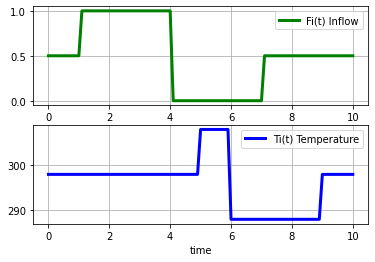

In [40]:
# plot results
plt.subplot(2,1,1)
plt.plot(t,Fi,"g-",linewidth = 3, label = "Fi(t) Inflow")
plt.grid()
plt.legend(loc = "best")
plt.subplot(2,1,2)
plt.plot(t,Ti,"b-",linewidth = 3, label= "Ti(t) Temperature")
plt.xlabel("time")
plt.grid()
plt.legend(loc = "best")

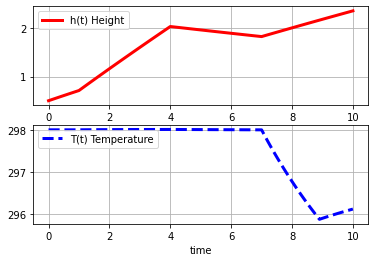

In [44]:
# plot results
plt.subplot(2,1,1)
plt.plot(t,h,"r-",linewidth = 3, label = "h(t) Height")
plt.grid()
plt.legend(loc = "best")
plt.subplot(2,1,2)
plt.plot(t,T,"b--",linewidth = 3, label= "T(t) Temperature")
plt.xlabel("time")
plt.grid()
plt.legend(loc = "best")